> # -  Logistic Regression Algorithm with Python

## Introducción

En este micro-proyecto, veremos uno de los muchos modelos de **clusterin** que existen por ahi, este modelo es considerado uno de los mas simples modelos entre ellos. A pesar de su simplicidad, el algoritmo **K-means** es enormemente usado para clustering en muchas aplicaciones de data sciens, especialmente útil si necesita descubrir rapidamente informacion de datos no etiquetados. En este micro-proyecto se implementará el algoritmo **K-means** para segmentación de clientes.

Algunas aplicaciones de la vida real de k-means son:

- Segmentación de clkientes
- Reconocimiento de patrones
- Machine learning
- Compresion de datos

Para el proyecto aplicaremos k-means clustering con 2 ejemplos:

- k-means sobre un dataset generado aleatoriamente
- Usando k-means para segmentacion de clientes

> ## - Importar Librerias necesarias

Primeramente importamos las librerias requeridas. Tambien ejecutamos **%matplotlib inline**  ya que estaremos graficando en esta seccion.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

> ## - K-Means generado sobre un dataset aleatorio

Crearemos nuestro propio dataset para esta parte del proyecto:

Primero necesitamos establecer un random seed. usamos la funcion **numpy´s random.seed()**, donde *seed* se establece a **0**

In [3]:
np.random.seed(0)

A continuacion estaremos haciendo *random cluster* de puntos mediante el uso de la clase**make_blobs**. la clase **make_blobs** puede tomar muchos entradas, pero estaremos usando estos especificamente:

**inputs**

- **n_samples**: El numero total de puntos de puntos divididos equitativamente entre los grupos.
    - El valor sera: 5000
- **centers**: El numero de centroides generados, o las ubicaciones de centros corregidas.
    - El valor sera: `[[4,4],[-2,-1],[2,-3],[1,1]]`
- **cluster_std**: La desviacion estandar de los clusteres.
    - El valor sera: 0.9
    
    
**Output**

- **X:** Matrizs de forma `[n_samples, n_features]. (Feature Matrix)`

- **y:** Matriz de forma `[n_samples]`
    


In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

- Visualizar la grafica de dispersion de los datos generados aleatoriamente

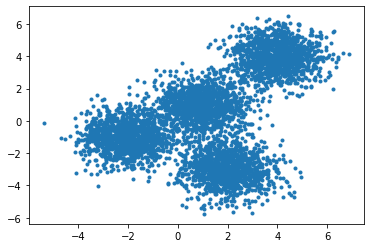

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

> ## - Configuracion K-Means

Ahora que tenemos nuestros datos aleatorios, vamos a configurar nuestro K-Means Clustering.

La clase **KMeans** tiene muchos parametros que pueden ser usados, pero estaremos usando estos 3: 

- **init**: Metodo de inicializacion de los centroides.
    - Los valores seran: "k-means++"
    - K-means++: Seleciona centros de cluster iniciales para k-means clustering en una inteligente manera de apresurar la convergencia.

- **n_cluster**: Los numeros de clusteres formados al igual que el numero de centroids generados.
    - El valor sera: 4

- **n_init**: Numero de veces que el algoritmo K-means sera ejecutado con diferentes centroides seeds. 
    - El valor sera: 12
    
Inicializamos KMeans con estos parametros, donde el parametro de salida es denominado **k_means**

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12 )

- Ahora ajustamos el modelo KMeans con la matriz de caracteristicas que creamos arrib, X

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

- Ahora agarramos las etiquetas para cada punto en el modelo usando KMeans.labels_attibute y lo guardamos como **k_means_labels**

In [10]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

Tambien obtenemos las cordenadas de el centro de cluster usando KMeans.cluster_centers_ y lo guardamos como **k_means_cluster_centers**

In [11]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

> ## - Creando la gráfica Visual

Entonces ahora que tenemos los datos generados aleatoriamente y los modelos KMeans inicializados, vamos a graficarlos y ver como se ve

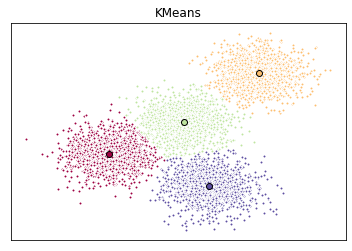

In [12]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


A modo de practica intentaremos graficar el dataset creado arriba con 3 clusteres

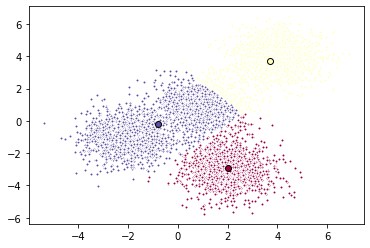

In [14]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

----

> # - Segmentacion de Clientes con K-Means

En esta parte vamos a trabajar con un dataset de clientes, y necesitamos aplicar segmentacion de clientes sobre los datos historicos. 
segmentacion de clientes es la practica de dividir una base de clientes en grupos individuales que tiene caracteristicas similares. Esta es una estrategia significativa ya que permite que el negocio se dirija a grupo especificos de clientes, con el fin de asignar eficazmente los recursos de marketing.

Por ejemplo, un grupo puede contener clientes con altos beneficios y bajo riesgo, es decir, es mas probable que compre productos o se suscriba a un servicio, conocer esta informacion permite a una empresa dedicar mas tiempo y atencion a retener a estos clientes.



> ## - Cargar los datos desde CSV FILE



In [15]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


> ## - Pre-procesamiento

Como se puede ver, **Address** en este dataset es una variable categorica, el algoritmo k-means no es directamente aplicable a variables categoricas porque la funcion de distancia Euclidiana no es dignificativa para variables discretas. Asi que vamos a dejar esta caracteristica y ejecutar el clustering.

In [17]:
df = cust_df.drop('Address', axis=1)
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


### Normalizando sobre la desviacion estandar

Ahora Vamos a normalizar el dataset, Pero porque necesitamos normalizacion en primer lugar? Normalizacion es un metodo estadistico que basado en algoritmos matematicos ayuda a interpretar caracteristicas con diferentes magnitudes y distribuciones igualmente. Usamos **StandardScaler()** para normalizar nuestro dataset.

In [19]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

> ## - Modelado

Vamos a aplicar k-means sobre nuestro dataset y veamos las etiquetas cluster.

In [21]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

### Perspectivas

Asignamos las etiquetas a cada fila en el dataframe

In [23]:
df["Clus_km"] = labels
df.head(6)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2


Podemos facilmente revisar los valores de centroides promediando las caracteristicas en cada cluster

In [25]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Ahora, veamos la distribucion de clientes basados en sus edades e ingresos.

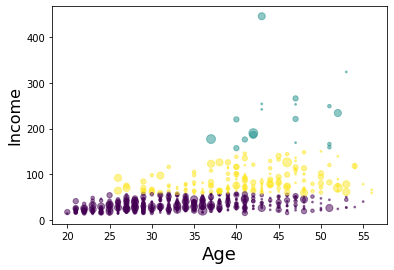

In [28]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

C:\Users\Tera\AppData\Local\Temp/ipykernel_1984/1687006791.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


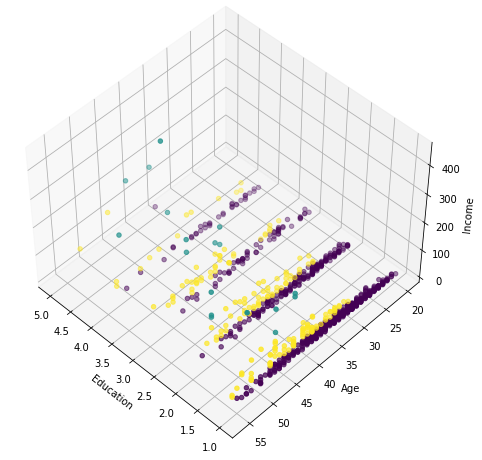

In [33]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))

El algoritmo k-means dividio los clientes, en grupos mutuamente exclusivos. Los clientes de cada grupo son similares a cada otro demograficamente. Ahora remos crear un perfil para cada grupo, considerando las caracteristicas comunes de cada cluster.